In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns

from matplotlib import rcParams

LoadDatas
-----
- excel data structure
    - column.row
    - col.0 : B1
    - col.1 : B1_1_동
    - col.2 : B1_1_호수
    - col.3:end : timeslot

In [3]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,아파트1-103-502,아파트1-103-1602,아파트1-103-301,아파트1-103-1502,아파트1-103-202,아파트1-102-903,아파트1-102-603,아파트1-102-203,아파트1-102-704,아파트1-102-703,아파트1-102-403,아파트1-102-303,아파트1-101-604,아파트1-101-1602,아파트1-101-1002,아파트1-101-1202,아파트1-101-1604,아파트1-101-402,아파트1-101-303,아파트1-101-502,아파트1-101-1403,아파트1-101-904,아파트1-101-1502,아파트1-101-1102,아파트1-101-901,아파트1-101-704,아파트1-101-504,아파트1-102-104,아파트1-102-301,아파트1-102-1501,아파트1-102-1602,아파트1-102-1002,아파트1-102-401,아파트1-102-802,아파트1-102-801,아파트1-103-505,아파트1-103-1805,아파트1-103-1306,아파트1-103-1806,아파트1-103-803,...,아파트4-103-609,아파트4-103-707,아파트4-103-101,아파트4-102-803,아파트4-101-1501,아파트4-103-404,아파트4-103-909,아파트4-101-1203,아파트4-103-806,아파트4-103-1410,아파트4-103-402,아파트4-103-703,아파트4-103-106,아파트4-103-910,아파트4-102-402,아파트4-103-907,아파트4-103-1406,아파트4-103-1006,아파트4-103-608,아파트4-103-403,아파트4-105-1102,아파트4-103-804,아파트4-103-103,아파트4-103-706,아파트4-104-1001,아파트4-105-103,아파트4-102-401,아파트4-103-1104,아파트4-103-906,아파트4-103-606,아파트4-103-1307,아파트4-103-410,아파트4-103-1309,아파트4-102-102,아파트4-103-508,아파트4-105-1104,아파트4-102-1402,아파트4-103-407,아파트4-103-1206,아파트4-103-108,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,0.149,0.039,0.054,0.132,0.091,0.169,0.051,0.118,0.060,0.047,0.047,0.053,0.046,0.104,0.079,0.092,0.043,0.069,0.139,0.026,0.146,0.092,0.025,0.127,0.045,0.042,0.113,0.207,0.030,0.171,0.045,0.064,0.045,0.277,0.186,0.142,0.132,0.034,0.088,0.041,...,0.041,0.137,0.114,0.046,0.098,0.058,0.068,0.040,0.063,0.048,0.168,0.053,0.099,0.075,0.080,0.158,0.024,0.153,0.056,0.037,0.091,0.069,0.128,0.092,0.072,0.069,0.034,0.166,0.086,0.113,0.184,0.175,0.096,0.054,0.080,0.084,0.119,0.088,0.117,0.161,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
1,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,0.119,0.023,0.075,0.142,0.063,0.183,0.045,0.164,0.065,0.066,0.043,0.056,0.045,0.130,0.081,0.102,0.042,0.083,0.176,0.046,0.113,0.088,0.026,0.116,0.066,0.050,0.139,0.188,0.031,0.165,0.032,0.068,0.052,0.244,0.209,0.205,0.161,0.039,0.094,0.036,...,0.036,0.083,0.124,0.055,0.115,0.068,0.072,0.032,0.085,0.111,0.173,0.050,0.103,0.068,0.076,0.360,0.031,0.132,0.038,0.037,0.097,0.075,0.123,0.072,0.053,0.059,0.023,0.135,0.143,0.112,0.101,0.163,0.154,0.078,0.036,0.076,0.092,0.042,0.121,0.179,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,0.116,0.018,0.071,0.096,0.159,0.122,0.043,0.141,0.097,0.064,0.055,0.054,0.051,0.119,0.109,0.097,0.056,0.086,0.126,0.036,0.113,0.079,0.027,0.170,0.072,0.044,0.163,0.201,0.053,0.163,0.041,0.071,0.046,0.256,0.173,0.199,0.122,0.028,0.084,0.026,...,0.045,0.081,0.115,0.063,0.070,0.053,0.078,0.036,0.083,0.111,0.084,0.053,0.084,0.071,0.087,0.471,0.024,0.079,0.047,0.036,0.078,0.059,0.137,0.084,0.083,0.056,0.036,0.106,0.160,0.108,0.184,0.162,0.124,0.135,0.053,0.073,0.108,0.056,0.100,0.224,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
3,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,0.102,0.031,0.128,0.082,0.104,0.141,0.031,0.103,0.075,0.082,0.046,0.016,0.046,0.078,0.070,0.073,0.051,0.085,0.098,0.048,0.145,0.078,0.021,0.142,0.062,0.034,0.149,0.194,0.038,0.065,0.043,0.070,0.043,0.274,0.047,0.108,0.162,0.034,0.069,0.038,...,0.039,0.086,0.068,0.035,0.064,0.061,0.065,0.022,0.066,0.087,0.080,0.047,0.079,0.066,0.029,0.187,0.030,0.059,0.055,0.035,0.080,0.074,0.090,0.066,0.071,0.062,0.034,0.114,0.121,0.108,0.051,0.170,0.068,0.072,0.074,0.078,0.101,0.080,0.084,0.178,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
4,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,0.102,0.032,0.122,0.069,0.089,0.103,0.011,0.094,0.084,0.053,0.047,0.022,0.048,0.040,0.077,0.089,0.041,0.092,0.062,0.045,0.109,0.109,0.033,0.084,0.069,0.035,0.225,0.199,0.078,

SetDatas
---
## 특정 가구를 날짜별로 나누는 작업
- timeslotDatas === tsDatas

In [4]:
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]

searchKeyword = '아파트1-104-1206'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])


,date,year,month,day
0,2018-05-01,2018,05,01
1,2018-05-02,2018,05,02
2,2018-05-03,2018,05,03
3,2018-05-04,2018,05,04
4,2018-05-05,2018,05,05
...,...,...,...,...
360,2019-04-26,2019,04,26
361,2019-04-27,2019,04,27
362,2019-04-28,2019,04,28
363,2019-04-29,2019,04,29


Select Season, Day
---
## 해당 가구의 데이터 중에서 계절, 날짜에 맞게 변환

In [5]:
DAYS = {
    "월" : 0,
    "화" : 1,
    "수" : 2,
    "목" : 3,
    "금" : 4,
    "토" : 5,
    "일" : 6
}

SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

# ALLDATAS is tsDatas
datas = tsDatas[(tsDatas['month'].isin(SEASONS['봄']))
        & (tsDatas['date'].dt.weekday == DAYS['월']) ]
datas

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,year,month,day
6,2018-05-07,0.100,0.117,0.078,0.052,0.051,0.032,0.044,0.051,0.050,0.043,0.030,0.050,0.051,0.050,0.034,0.041,0.051,0.050,0.047,0.030,0.046,0.050,0.050,0.036,0.036,0.051,0.050,0.043,0.030,0.053,0.056,0.093,0.052,0.058,0.056,0.055,0.055,0.054,0.054,0.054,0.053,0.053,0.053,0.054,0.053,0.053,0.052,0.054,0.053,0.053,0.052,0.053,0.046,0.032,0.054,0.052,0.053,0.052,0.032,0.046,0.053,0.053,0.052,0.034,0.045,0.054,0.052,0.052,0.033,0.047,0.054,0.053,0.053,0.034,0.046,0.053,0.053,0.052,0.039,0.040,0.053,0.053,0.052,0.041,0.076,0.119,0.084,0.084,0.070,0.071,0.086,0.090,0.090,0.084,0.081,0.088,2018,05,07
13,2018-05-14,0.113,0.076,0.056,0.059,0.059,0.047,0.055,0.057,0.056,0.054,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.052,0.053,0.052,0.052,0.054,0.052,0.052,0.052,0.051,0.052,0.051,0.051,0.051,0.058,0.092,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.050,0.043,0.030,0.049,0.051,0.050,0.043,0.029,0.049,0.051,0.051,0.038,0.032,0.050,0.050,0.048,0.030,0.044,0.051,0.050,0.037,0.034,0.056,0.056,0.053,0.043,0.054,0.053,0.052,0.052,0.052,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.118,0.089,0.064,0.062,0.061,0.060,0.059,0.057,0.054,0.053,0.050,0.050,0.050,0.046,0.029,0.046,0.050,0.050,0.041,2018,05,14
20,2018-05-21,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.056,0.055,0.056,0.056,0.055,0.054,0.055,0.055,0.054,0.055,0.055,0.055,0.054,0.051,0.035,0.055,0.055,0.055,0.053,0.040,0.043,0.055,0.054,0.055,0.046,0.037,0.055,0.055,0.055,0.038,0.045,0.062,0.087,0.133,0.070,0.073,0.086,0.084,0.080,0.063,0.082,0.085,0.084,2018,05,21
27,2018-05-28,0.054,0.054,0.054,0.054,0.054,0.080,0.067,0.053,0.055,0.054,0.055,0.054,0.054,0.053,0.053,0.043,0.039,0.053,0.054,0.053,0.052,0.033,0.048,0.054,0.053,0.053,0.036,0.044,0.054,0.053,0.053,0.076,0.043,0.050,0.051,0.050,0.031,0.045,0.050,0.050,0.051,0.032,0.044,0.051,0.050,0.050,0.043,0.033,0.051,0.052,0.058,0.056,0.043,0.053,0.054,0.052,0.052,0.051,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.050,0.050,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.050,0.051,0.084,0.097,0.093,0.096,0.071,0.062,0.061,0.052,0.041,0.058,2018,05,28
307,2019-03-04,0.029,0.021,0.021,0.021,0.035,0.037,0.021,0.020,0.021,0.028,0.037,0.028,0.020,0.022,0.020,0.037,0.034,0.021,0.021,0.021,0.028,0.038,0.025,0.021,0.051,0.033,0.037,0.033,0.021,0.021,0.021,0.029,0.037,0.025,0.021,0.021,0.021,0.038,0.032,0.021,0.021,0.021,0.030,0.037,0.024,0.021,0.021,0.021,0.038,0.031,0.021,0.021,0.020,0.032,0.037,0.024,0.021,0.021,0.021,0.040,0.031,0.021,0.021,0.021,0.031,0.037,0.023,0.021,0.021,0.024,0.038,0.030,0.021,0.021,0.022,0.032,0.038,0.021,0.021,0.028,0.076,0.092,0.081,0.075,0.062,0.061,0.072,0.076,0.061,0.060,0.061,0.065,0.073,0.029,0.022,0.022,2019,03,04
314,2019-03-11,0.013,0.013,0.013,0.029,0.037,0.016,0.012,0.013,0.026,0.031,0.023,0.013,0.012,0.021,0.028,0.029,0.016,0.021,0.012,0.018,0.030,0.030,0.016,0.013,0.033,0.037,0.029,0.018,0.013,0.013,0.013,0.031,0.027,0.013,0.012,0.013,0.021,0.029,0.021,0.013,0.013,0.012,0.028,0.029,0.014,0.013,0.013,0.016,0.030,0.024,0.013,0.012,0.013,0.023,0.029,0.018,0.012,0.013,0.013,0.028,0.028,0.013,0.013,0.012,0.017,0.030,0.022,0.013,0.012,0.013,0.022,0.029,0.017,0.013,0.013,0.012,0.026,0.029,0.026,0.064,0.053,0.048,0.064,0.062,0.056,0.046,0.046,0.052,0.070,0.061,0.036,0.013,0.016,0.025,0.029,0.020,2019,03,11
321,2019-03-18,0.050,0.041,0.040,0.009,0.041,0.043,0.027,0.026,0.026,0.033,0.025,0.019,0.007,0

DataPreprocessing
---
- 데이터 전처리
    - StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 특성의
        스케일을 맞춘다.

In [6]:
dpp = datas[datas.columns.difference(['date', 'year', 'month', 'day'])]
dpp = dpp

scaler = StandardScaler()
dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = datas['date']
dpp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-07,1.856783,2.630712,2.208264,1.244011,1.004749,-0.007843,0.829315,1.314867,1.242827,0.769627,0.033124,1.177234,1.352854,1.331413,0.394780,0.756024,1.317396,1.229840e+00,1.178889,0.255,1.130727,1.385470,1.242069,0.425671,0.300737,1.240522,1.377136,0.901388,0.004902,1.430193,1.508284,1.886327,1.467970,1.719184,1.495671,1.582832,1.856225,1.534937,1.530853,1.540140,1.449581,2.098214,1.610066,1.450745,1.533566,1.557711,1.717240,1.842755,1.418689,1.458838,1.514451,1.534383,1.153754,0.269966,1.416992,1.612131,1.534097,1.296178,0.293936,1.142245,1.598383,1.423361,1.345955,0.330503,1.089383,1.387246,1.479550,1.655248,0.386170,1.060944,1.402189,1.451571,1.691545,0.440373,0.700973,0.893772,0.081280,0.023986,-0.423469,-0.596726,-0.192303,-0.116823,-0.169217,-0.785366,1.129233,2.371944,0.632203,1.042783,0.262553,0.099445,0.930818,1.228459,1.603510,1.548515,1.422714,1.800495
2018-05-14,2.256524,1.314121,1.143233,1.664848,1.488517,0.756880,1.388712,1.661353,1.632146,1.498480,1.509528,1.403960,1.517219,1.531896,1.712493,1.502478,1.441499,1.352824e+00,1.539490,1.685,1.489250,1.644623,1.372813,1.467313,1.326202,1.240522,1.501894,1.416467,1.343202,1.312890,1.615138,1.853099,1.407770,1.319067,1.216307,1.346317,1.591050,1.298793,1.360272,1.309341,0.867959,0.315924,1.343431,1.288628,1.364135,0.963862,0.087225,1.493545,1.301591,1.349214,0.729180,0.253384,1.422790,1.439820,1.089024,0.316992,1.018323,1.237054,1.459718,0.575962,0.463899,1.584263,1.571002,1.513609,0.962937,1.387246,1.537484,1.655248,1.563750,1.355650,1.229134,1.278448,1.559075,1.458124,0.967424,0.731646,0.015240,2.596471,1.929135,0.782374,0.319048,0.333162,0.282028,0.138130,-0.067851,-0.265283,-0.520638,-0.639371,-0.590745,-0.776311,-0.755681,-1.021352,-0.439269,0.024142,0.122592,0.017509
2018-05-21,0.380818,0.543434,0.949591,1.244011,1.065220,1.011788,1.236149,1.372615,1.372600,1.365961,1.386494,1.290597,1.407642,1.465068,1.643140,1.440274,1.379447,1.352824e+00,1.479390,1.685,1.489250,1.515046,1.372813,1.467313,1.326202,1.307438,1.501894,1.480851,1.406930,1.371542,1.294576,0.523980,1.467970,1.376226,1.272180,1.405446,1.657344,1.416865,1.417132,1.424740,1.391419,2.020723,1.543407,1.342667,1.477089,1.498326,1.717240,1.703071,1.360140,1.404026,1.514451,1.473383,1.557309,1.829771,1.471654,1.847611,1.706022,1.473550,1.718781,1.708527,1.717803,1.476995,1.514740,1.638146,1.721614,1.387246,1.421616,0.588747,1.749683,1.532474,1.459874,1.451571,0.830488,1.012858,1.180586,0.947814,0.147319,-0.209876,-0.517573,0.265212,-0.078669,-0.004327,-0.958896,-0.580145,0.247171,1.073617,2.454436,0.350131,0.390548,0.724985,0.846493,0.859638,0.349987,1.458846,1.590472,1.648752
2018-05-28,0.442317,0.607658,1.046412,1.364250,1.186162,2.439272,1.998963,1.430363,1.567260,1.498480,1.571044,1.403960,1.517219,1.531896,1.712493,0.880433,0.572781,1.414316e+00,1.599591,1.750,1.489250,0.284071,1.111325,1.597518,1.390293,1.374355,0.503830,0.965773,1.534387,1.430193,1.348003,1.321451,0.926164,1.261907,1.216307,1.287188,0.265175,1.003613,1.303412,1.309341,1.333257,0.470906,1.010137,1.288628,1.364135,1.379556,1.079408,0.376072,1.301591,1.404026,1.850996,1.717383,0.951976,1.634796,1.416992,1.612131,1.476789,1.237054,1.524484,1.456846,1.478964,1.316094,1.289693,1.326802,1.468722,1.218175,1.363682,1.592513,1.501772,1.237768,1.229134,1.336156,1.492840,1.521733,0.967424,0.731646,-0.017780,-0.014991,0.094104,-0.022101,-0.305937,-0.285567,-0.282028,-0.323618,-0.508882,-0.387001,0.632203,1.685959,1.243847,1.142012,0.298381,0.195759,0.257133,0.113811,-0.254863,0.662419
2019-03-04,-0.326415,-0.452038,-0.551135,-0.619693,0.037213,0.247065,-0.340332,-0.47

Dimensionality Reduction
---
- 차원축소
    - PCA : Principal component analysis, 주성분 분석

In [7]:
pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = datas['date']
dr

,x,y
date,,
2018-05-07,11.459121,-0.699216
2018-05-14,11.084191,2.470812
2018-05-21,12.645530,0.007833
2018-05-28,11.223524,0.934446
2019-03-04,-1.231560,-0.164550
2019-03-11,-5.287013,2.301037
2019-03-18,-5.734383,0.711375
2019-03-25,-2.694101,-6.699826
2019-04-01,-8.150084,-2.647204


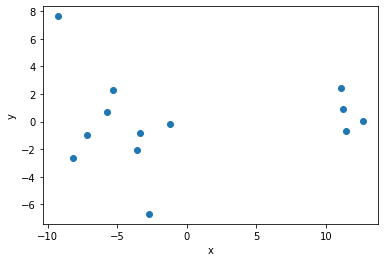

In [8]:
plt.scatter(dr['x'], dr['y'], marker = 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
K = 2

points = dr.values
kmeans = KMeans(n_clusters=K).fit(points)
centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])

clusterNum = [i for i in range(K)]
centers['cluster'] = [i for i in range(len(centers))]
centers['type'] = [f'cluster' for dt in clusterNum]
centers

,x,y,cluster,type
0,11.603091,0.678469,0,cluster
1,-5.156930,-0.301542,1,cluster


In [10]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
clustering = dr
clustering['cluster'] = kmeans.labels_
clustering['type'] = ['data' for i in range(len(clustering['x']))]

result = pd.concat([clustering, centers], axis = 0)

result

,x,y,cluster,type
2018-05-07 00:00:00,11.459121,-0.699216,0,data
2018-05-14 00:00:00,11.084191,2.470812,0,data
2018-05-21 00:00:00,12.645530,0.007833,0,data
2018-05-28 00:00:00,11.223524,0.934446,0,data
2019-03-04 00:00:00,-1.231560,-0.164550,1,data
2019-03-11 00:00:00,-5.287013,2.301037,1,data
2019-03-18 00:00:00,-5.734383,0.711375,1,data
2019-03-25 00:00:00,-2.694101,-6.699826,1,data
2019-04-01 00:00:00,-8.150084,-2.647204,1,data
2019-04-08 00:00:00,-3.590298,-2.054368,1,data


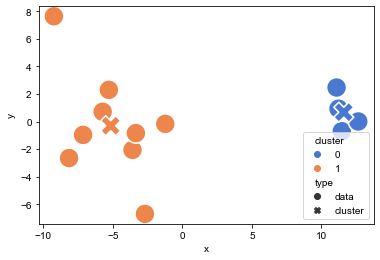

In [12]:
sns.scatterplot(x='x', y="y", 
                hue="cluster", 
                style="type",
                palette="muted",
                s=400,
                data=result)
sns.set(rc={'figure.figsize': (11.7, 8.27)})
rcParams['figure.figsize'] = 11.7,8.27
plt.title = "클러스터링 결과물"
plt.show()

In [142]:
tsCheck = datas[datas.columns.difference(['year', 'month', 'day'])]
tsCheck.reset_index(inplace=True)
del tsCheck['index']
tsCheck = tsCheck.set_index('date')
tsCheck['cluster'] = clustering['cluster']
tsCheck.reset_index(inplace=True)
tsCheck.set_index(['cluster', 'date'], inplace=True)
tsCheck = tsCheck.T

In [143]:
tsCheck

cluster          0                                           1             \
date    2018-05-07 2018-05-14 2018-05-21 2018-05-28 2019-03-04 2019-03-11   
0            0.100      0.113      0.052      0.054      0.029      0.013   
1            0.117      0.076      0.052      0.054      0.021      0.013   
2            0.078      0.056      0.052      0.054      0.021      0.013   
3            0.052      0.059      0.052      0.054      0.021      0.029   
4            0.051      0.059      0.052      0.054      0.035      0.037   
..             ...        ...        ...        ...        ...        ...   
91           0.090      0.029      0.080      0.062      0.065      0.013   
92           0.090      0.046      0.063      0.061      0.073      0.016   
93           0.084      0.050      0.082      0.052      0.029      0.025   
94           0.081      0.050      0.085      0.041      0.022      0.029   
95           0.088      0.041      0.084      0.058      0.022      0.020   

cluster                                                                    \
date    2019-03-18 2019-03-25 2019-04-01 2019-04-08 2019-04-15 2019-04-22   
0            0.050      0.031      0.007      0.022      0.015      0.007   
1            0.041      0.019      0.016      0.016      0.015      0.008   
2            0.040      0.016      0.024      0.020      0.015      0.025   
3            0.009      0.015      0.014      0.033      0.030      0.020   
4            0.041      0.017      0.007      0.032      0.031      0.007   
..             ...        ...        ...        ...        ...        ...   
91           0.041      0.105      0.078      0.066      0.047      0.014   
92           0.042      0.094      0.060      0.050      0.056      0.024   
93           0.041      0.081      0.061      0.018      0.053      0.018   
94           0.049      0.077      0.060      0.015      0.041      0.007   
95           0.057      0.068      0.026      0.015      0.022      0.007   

cluster             
date    2019-04-29  
0            0.022  
1            0.008  
2            0.007  
3            0.019  
4            0.024  
..             ...  
91           0.047  
92           0.046  
93           0.049  
94           0.055  
95           0.019  

[96 rows x 13 columns]

In [24]:
test = [tsCheck[ts] for ts in tsCheck]
test

[0     0.100
 1     0.117
 2     0.078
 3     0.052
 4     0.051
       ...  
 91    0.090
 92    0.090
 93    0.084
 94    0.081
 95    0.088
 Name: (0, 2018-05-07 00:00:00), Length: 96, dtype: float64,
 0     0.113
 1     0.076
 2     0.056
 3     0.059
 4     0.059
       ...  
 91    0.029
 92    0.046
 93    0.050
 94    0.050
 95    0.041
 Name: (0, 2018-05-14 00:00:00), Length: 96, dtype: float64,
 0     0.052
 1     0.052
 2     0.052
 3     0.052
 4     0.052
       ...  
 91    0.080
 92    0.063
 93    0.082
 94    0.085
 95    0.084
 Name: (0, 2018-05-21 00:00:00), Length: 96, dtype: float64,
 0     0.054
 1     0.054
 2     0.054
 3     0.054
 4     0.054
       ...  
 91    0.062
 92    0.061
 93    0.052
 94    0.041
 95    0.058
 Name: (0, 2018-05-28 00:00:00), Length: 96, dtype: float64,
 0     0.029
 1     0.021
 2     0.021
 3     0.021
 4     0.035
       ...  
 91    0.065
 92    0.073
 93    0.029
 94    0.022
 95    0.022
 Name: (1, 2019-03-04 00:00:00), Length: 

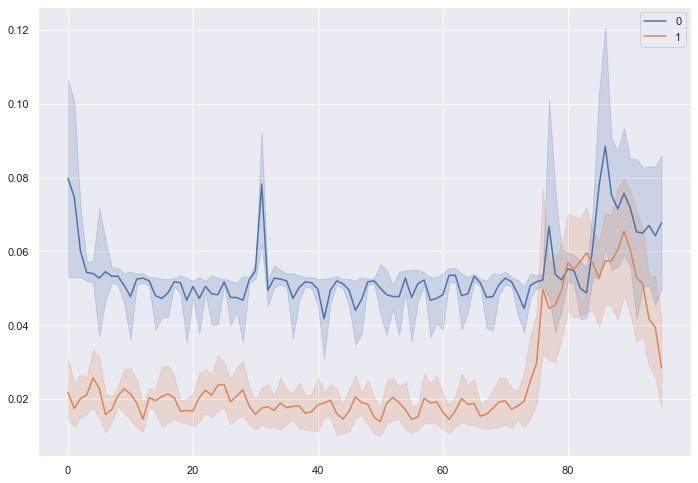

In [25]:
sns.lineplot(data=tsCheck, 
             dashes=False)
plt.show()

In [144]:
test = tsCheck

In [145]:
test

cluster          0                                           1             \
date    2018-05-07 2018-05-14 2018-05-21 2018-05-28 2019-03-04 2019-03-11   
0            0.100      0.113      0.052      0.054      0.029      0.013   
1            0.117      0.076      0.052      0.054      0.021      0.013   
2            0.078      0.056      0.052      0.054      0.021      0.013   
3            0.052      0.059      0.052      0.054      0.021      0.029   
4            0.051      0.059      0.052      0.054      0.035      0.037   
..             ...        ...        ...        ...        ...        ...   
91           0.090      0.029      0.080      0.062      0.065      0.013   
92           0.090      0.046      0.063      0.061      0.073      0.016   
93           0.084      0.050      0.082      0.052      0.029      0.025   
94           0.081      0.050      0.085      0.041      0.022      0.029   
95           0.088      0.041      0.084      0.058      0.022      0.020   

cluster                                                                    \
date    2019-03-18 2019-03-25 2019-04-01 2019-04-08 2019-04-15 2019-04-22   
0            0.050      0.031      0.007      0.022      0.015      0.007   
1            0.041      0.019      0.016      0.016      0.015      0.008   
2            0.040      0.016      0.024      0.020      0.015      0.025   
3            0.009      0.015      0.014      0.033      0.030      0.020   
4            0.041      0.017      0.007      0.032      0.031      0.007   
..             ...        ...        ...        ...        ...        ...   
91           0.041      0.105      0.078      0.066      0.047      0.014   
92           0.042      0.094      0.060      0.050      0.056      0.024   
93           0.041      0.081      0.061      0.018      0.053      0.018   
94           0.049      0.077      0.060      0.015      0.041      0.007   
95           0.057      0.068      0.026      0.015      0.022      0.007   

cluster             
date    2019-04-29  
0            0.022  
1            0.008  
2            0.007  
3            0.019  
4            0.024  
..             ...  
91           0.047  
92           0.046  
93           0.049  
94           0.055  
95           0.019  

[96 rows x 13 columns]

In [112]:
test.iloc[0:12]

cluster          0                                           1             \
date    2018-05-07 2018-05-14 2018-05-21 2018-05-28 2019-03-04 2019-03-11   
0            0.100      0.113      0.052      0.054      0.029      0.013   
1            0.117      0.076      0.052      0.054      0.021      0.013   
2            0.078      0.056      0.052      0.054      0.021      0.013   
3            0.052      0.059      0.052      0.054      0.021      0.029   
4            0.051      0.059      0.052      0.054      0.035      0.037   
5            0.032      0.047      0.052      0.080      0.037      0.016   
6            0.044      0.055      0.052      0.067      0.021      0.012   
7            0.051      0.057      0.052      0.053      0.020      0.013   
8            0.050      0.056      0.052      0.055      0.021      0.026   
9            0.043      0.054      0.052      0.054      0.028      0.031   
10           0.030      0.054      0.052      0.055      0.037      0.023   
11           0.050      0.054      0.052      0.054      0.028      0.013   

cluster                                                                    \
date    2019-03-18 2019-03-25 2019-04-01 2019-04-08 2019-04-15 2019-04-22   
0            0.050      0.031      0.007      0.022      0.015      0.007   
1            0.041      0.019      0.016      0.016      0.015      0.008   
2            0.040      0.016      0.024      0.020      0.015      0.025   
3            0.009      0.015      0.014      0.033      0.030      0.020   
4            0.041      0.017      0.007      0.032      0.031      0.007   
5            0.043      0.034      0.007      0.024      0.024      0.007   
6            0.027      0.030      0.007      0.016      0.015      0.007   
7            0.026      0.016      0.024      0.016      0.015      0.017   
8            0.026      0.016      0.021      0.015      0.015      0.024   
9            0.033      0.015      0.007      0.032      0.024      0.012   
10           0.025      0.021      0.007      0.032      0.032      0.007   
11           0.019      0.033      0.007      0.028      0.028      0.007   

cluster             
date    2019-04-29  
0            0.022  
1            0.008  
2            0.007  
3            0.019  
4            0.024  
5            0.015  
6            0.007  
7            0.007  
8            0.024  
9            0.023  
10           0.008  
11           0.007

In [122]:
test.iloc[0:12].sum() / 12

cluster  date      
0        2018-05-07    0.058167
         2018-05-14    0.061667
         2018-05-21    0.052000
         2018-05-28    0.057333
1        2019-03-04    0.026583
         2019-03-11    0.019917
         2019-03-18    0.031667
         2019-03-25    0.021917
         2019-04-01    0.012333
         2019-04-08    0.023833
         2019-04-15    0.021583
         2019-04-22    0.012333
         2019-04-29    0.014250
dtype: float64

In [146]:
test.iloc[0] = (test[0:12].sum() / 12)
test.iloc[1] = (test[12:24].sum() / 12)
test.iloc[2] = (test[24:36].sum() / 12)
test.iloc[3] = (test[36:48].sum() / 12)
test.iloc[4] = (test[48:60].sum() / 12)
test.iloc[5] = (test[60:72].sum() / 12)
test.iloc[6] = (test[72:84].sum() / 12)
test.iloc[7] = (test[84:96].sum() / 12)

In [150]:
test = test.iloc[0:8]

In [151]:
test

cluster          0                                           1             \
date    2018-05-07 2018-05-14 2018-05-21 2018-05-28 2019-03-04 2019-03-11   
0         0.058167   0.061667   0.052000   0.057333   0.026583   0.019917   
1         0.044667   0.052750   0.052000   0.049083   0.025667   0.020500   
2         0.052750   0.055167   0.052000   0.051333   0.029167   0.021000   
3         0.053500   0.045500   0.052000   0.044167   0.025667   0.018500   
4         0.048167   0.044333   0.053917   0.052000   0.027250   0.019000   
5         0.048500   0.050500   0.052667   0.050750   0.026583   0.018667   
6         0.047417   0.063833   0.048167   0.050333   0.044000   0.035583   
7         0.085250   0.048000   0.082417   0.068000   0.055333   0.039167   

cluster                                                                    \
date    2019-03-18 2019-03-25 2019-04-01 2019-04-08 2019-04-15 2019-04-22   
0         0.031667   0.021917   0.012333   0.023833   0.021583   0.012333   
1         0.019833   0.021667   0.012000   0.022250   0.021083   0.012417   
2         0.021417   0.022500   0.012500   0.021583   0.020750   0.013500   
3         0.012750   0.020667   0.012083   0.021000   0.020583   0.013583   
4         0.012250   0.020583   0.011667   0.020750   0.020333   0.013583   
5         0.012250   0.020750   0.011833   0.020833   0.020667   0.013250   
6         0.037750   0.060833   0.042250   0.053750   0.051417   0.013000   
7         0.047750   0.087417   0.070000   0.049083   0.052083   0.012833   

cluster             
date    2019-04-29  
0         0.014250  
1         0.017583  
2         0.012250  
3         0.014667  
4         0.012583  
5         0.012417  
6         0.044167  
7         0.054667

In [159]:

'''
sns.lineplot(data=test, 
             dashes=False,
             estimator=None)
plt.show()
'''
test['index'] = [3,6,9,12,15,18,21,24]
test

<ipython-input-159-77073b7604af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['index'] = [3,6,9,12,15,18,21,24]


cluster                   0                                          \
date    2018-05-07 00:00:00 2018-05-14 00:00:00 2018-05-21 00:00:00   
0                  0.058167            0.061667            0.052000   
1                  0.044667            0.052750            0.052000   
2                  0.052750            0.055167            0.052000   
3                  0.053500            0.045500            0.052000   
4                  0.048167            0.044333            0.053917   
5                  0.048500            0.050500            0.052667   
6                  0.047417            0.063833            0.048167   
7                  0.085250            0.048000            0.082417   

cluster                                       1                      \
date    2018-05-28 00:00:00 2019-03-04 00:00:00 2019-03-11 00:00:00   
0                  0.057333            0.026583            0.019917   
1                  0.049083            0.025667            0.020500   
2                  0.051333            0.029167            0.021000   
3                  0.044167            0.025667            0.018500   
4                  0.052000            0.027250            0.019000   
5                  0.050750            0.026583            0.018667   
6                  0.050333            0.044000            0.035583   
7                  0.068000            0.055333            0.039167   

cluster                                                              \
date    2019-03-18 00:00:00 2019-03-25 00:00:00 2019-04-01 00:00:00   
0                  0.031667            0.021917            0.012333   
1                  0.019833            0.021667            0.012000   
2                  0.021417            0.022500            0.012500   
3                  0.012750            0.020667            0.012083   
4                  0.012250            0.020583            0.011667   
5                  0.012250            0.020750            0.011833   
6                  0.037750            0.060833            0.042250   
7                  0.047750            0.087417            0.070000   

cluster                                                              \
date    2019-04-08 00:00:00 2019-04-15 00:00:00 2019-04-22 00:00:00   
0                  0.023833            0.021583            0.012333   
1                  0.022250            0.021083            0.012417   
2                  0.021583            0.020750            0.013500   
3                  0.021000            0.020583            0.013583   
4                  0.020750            0.020333            0.013583   
5                  0.020833            0.020667            0.013250   
6                  0.053750            0.051417            0.013000   
7                  0.049083            0.052083            0.012833   

cluster                     index  
date    2019-04-29 00:00:00        
0                  0.014250     3  
1                  0.017583     6  
2                  0.012250     9  
3                  0.014667    12  
4                  0.012583    15  
5                  0.012417    18  
6                  0.044167    21  
7                  0.054667    24

In [172]:
# test = test.set_index('index')
test

cluster                   0                                          \
date    2018-05-07 00:00:00 2018-05-14 00:00:00 2018-05-21 00:00:00   
index                                                                 
3                  0.058167            0.061667            0.052000   
6                  0.044667            0.052750            0.052000   
9                  0.052750            0.055167            0.052000   
12                 0.053500            0.045500            0.052000   
15                 0.048167            0.044333            0.053917   
18                 0.048500            0.050500            0.052667   
21                 0.047417            0.063833            0.048167   
24                 0.085250            0.048000            0.082417   

cluster                                       1                      \
date    2018-05-28 00:00:00 2019-03-04 00:00:00 2019-03-11 00:00:00   
index                                                                 
3                  0.057333            0.026583            0.019917   
6                  0.049083            0.025667            0.020500   
9                  0.051333            0.029167            0.021000   
12                 0.044167            0.025667            0.018500   
15                 0.052000            0.027250            0.019000   
18                 0.050750            0.026583            0.018667   
21                 0.050333            0.044000            0.035583   
24                 0.068000            0.055333            0.039167   

cluster                                                              \
date    2019-03-18 00:00:00 2019-03-25 00:00:00 2019-04-01 00:00:00   
index                                                                 
3                  0.031667            0.021917            0.012333   
6                  0.019833            0.021667            0.012000   
9                  0.021417            0.022500            0.012500   
12                 0.012750            0.020667            0.012083   
15                 0.012250            0.020583            0.011667   
18                 0.012250            0.020750            0.011833   
21                 0.037750            0.060833            0.042250   
24                 0.047750            0.087417            0.070000   

cluster                                                              \
date    2019-04-08 00:00:00 2019-04-15 00:00:00 2019-04-22 00:00:00   
index                                                                 
3                  0.023833            0.021583            0.012333   
6                  0.022250            0.021083            0.012417   
9                  0.021583            0.020750            0.013500   
12                 0.021000            0.020583            0.013583   
15                 0.020750            0.020333            0.013583   
18                 0.020833            0.020667            0.013250   
21                 0.053750            0.051417            0.013000   
24                 0.049083            0.052083            0.012833   

cluster                      
date    2019-04-29 00:00:00  
index                        
3                  0.014250  
6                  0.017583  
9                  0.012250  
12                 0.014667  
15                 0.012583  
18                 0.012417  
21                 0.044167  
24                 0.054667

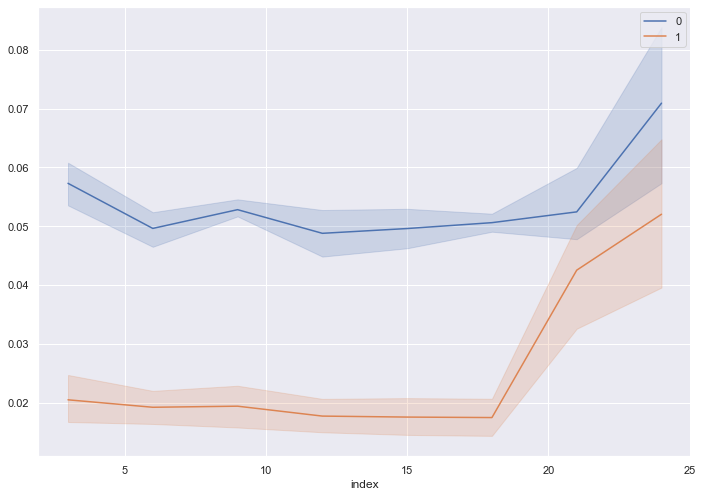

In [177]:
sns.lineplot(data=test,
             dashes=False)
plt.show()